In [1]:
import numpy as np
import matplotlib.pyplot as plt


n = 16
iter_num = 1024

def f(x):
    return 1/4 * (np.dot(x, x)) ** 2 + 1/2 * np.dot(x, x)

def grad_f(x):
    return (np.dot(x, x) + 1) * x

# Hessian of f = 2 * x * x^T + (x^T * x + 1) * I
# Hf 在 x_0 处的最大特征值为 3n + 1，Lipschitz 常数为 3n + 1


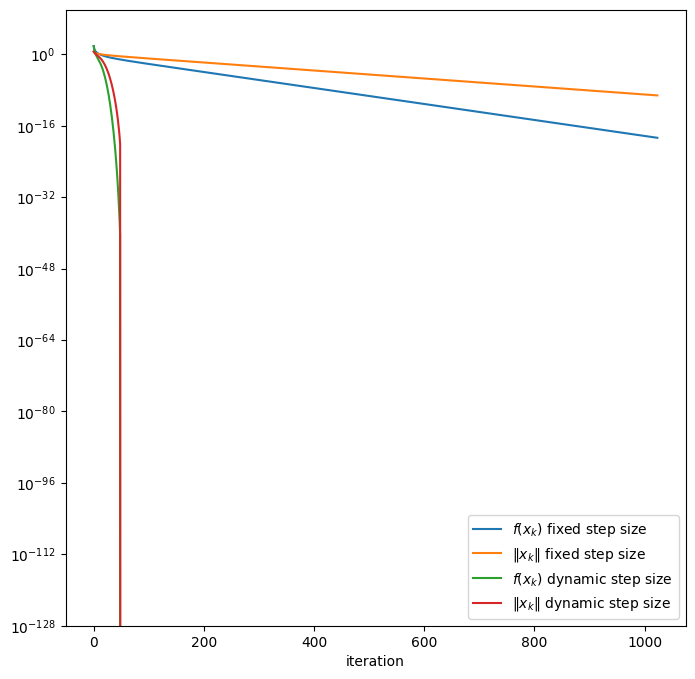

In [2]:
# 取固定步长 alpha_k = 1 / (3n + 1)

x = np.ones(n)
fs_fixed = []
errors_fixed = []
for i in range(iter_num):
    fs_fixed.append(f(x))
    errors_fixed.append(np.linalg.norm(x))

    alpha_k = 1 / (3 * n + 1)
    x_new = x - alpha_k * grad_f(x)
    x = x_new

# 取自适应步长 alpha_k = 1 / (3n + 1 + 2 * k)
x = np.ones(n)
fs_dynamic = []
errors_dynamic = []
for i in range(iter_num):
    fs_dynamic.append(f(x))
    errors_dynamic.append(np.linalg.norm(x))

    alpha_k = (1 + i) / (3 * n + 1)
    x_new = x - alpha_k * grad_f(x)
    x = x_new


fig = plt.figure(figsize=(8, 8))
plt.yscale('log')
plt.plot(fs_fixed, label=r'$f(x_k)$ fixed step size')
plt.plot(errors_fixed, label=r'$\|x_k\|$ fixed step size')
plt.plot(fs_dynamic, label=r'$f(x_k)$ dynamic step size')
plt.plot(errors_dynamic, label=r'$\|x_k\|$ dynamic step size')
plt.xlabel('iteration')
plt.ylim(1e-128, 1e10)
plt.legend()
plt.show()
fig.savefig('../problem_6_plot.png', dpi=300)